# TCC - Genetic Algorithm to control Waves in Games

### Authors:
 - Daniel Hotta
 - Rafael Gonçalves Pereira Silva
 - Ricardo Akira Tanaka

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as mpgs
from matplotlib.backends.backend_pdf import PdfPages


## Simple description

This notebook uses the results of the experiments we made with our Genetic Algorithm to conclude the overall perfomance agrandomnst a Uniform Enemy Generator and "Naive Strategies" (Like All Enemies with the same color or One of Each color).
For uniform enemies, 10 waves were enough data, otherwise (random and AI) 30 waves were collected.

- The libs you can find in two repositories: [SpaceShip](https://github.com/RGPRafael/godot) and [Tower Defense](https://github.com/raktanaka/tccTD)

- The full dataset can be found [here](https://github.com/raktanaka/tcc-results).




In [2]:
def GetFilelist():
    td_files = []
    ss_files = []

    for subdir, dirs, files in os.walk('.'):
        for file in files:
            if subdir[2:] == 'tccTD' and filepath.endswith('.txt'):
                filepath = subdir + os.sep + file
                td_files.append(filepath)
            elif subdir[2:] == 'tccSS' and filepath.endswith('.txt'):
                filepath = subdir + os.sep + file
                ss_files.append(filepath)
            else:
                pass
    return(td_files, ss_files)

Reads txt data, trimmings results for 300 lines in case of 10 waves, or 900 lines for 30 waves.

In [3]:
def GetFileData(filepath):
  df = pd.read_csv(filepath, header=None, delimiter=';')

  if df.shape[0] < 899:
    return(df.iloc[:300])
  else:
    return(df.iloc[:900])
    

In [4]:
td_allred_ai_file = os.path.join('tccTD', 'AllRed - AI.txt')
td_allred_rd_file = os.path.join('tccTD', 'AllRed - Random.txt')

td_allgreen_ai_file = os.path.join('tccTD', 'AllGreen - AI.txt')
td_allgreen_rd_file = os.path.join('tccTD', 'AllGreen - Random.txt')

td_greenred_ai_file = os.path.join('tccTD', 'GreenRed - AI.txt')
td_greenred_rd_file = os.path.join('tccTD', 'GreenRed - Random.txt')

td_redgreen_ai_file = os.path.join('tccTD', 'RedGreen - AI.txt')
td_redgreen_rd_file = os.path.join('tccTD', 'RedGreen - Random.txt')

In [5]:
ss_yellowmove_ai_file = os.path.join('tccSS', 'IA_MOVING_ SHOOTING _YELLOW_SHOOT - AI.txt')
ss_yellowmove_rd_file = os.path.join('tccSS', 'IA_MOVING_ SHOOTING _YELLOW_SHOOT - Random.txt')

ss_yellowstill_ai_file = os.path.join('tccSS', 'IA_STILL_YELLOW_SHOOT - AI.txt')
ss_yellowstill_rd_file = os.path.join('tccSS', 'IA_STILL_YELLOW_SHOOT - Random.txt')

ss_redmove_ai_file = os.path.join('tccSS', 'IA_MOVING_SHOOTING_ RED_SHOOT - AI.txt')
ss_redmove_rd_file = os.path.join('tccSS', 'IA_MOVING_SHOOTING_ RED_SHOOT - Random.txt')

#ss_redstill_ai_file = os.path.join('tccSS', 'IA_STILL_RED_SHOOT - AI.txt')
#ss_redstill_rd_file = os.path.join('tccSS', 'IA_STILL_RED_SHOOT - Random.txt')

Tower Defense data "header"
0: wave number
1-12: element in wave
13: damage done in wave

In [5]:
td_allred_ai = GetFileData(td_allred_ai_file)
td_allred_rd = GetFileData(td_allred_rd_file)

td_allgreen_ai = GetFileData(td_allgreen_ai_file)
td_allgreen_rd = GetFileData(td_allgreen_rd_file)

td_greenred_ai = GetFileData(td_greenred_ai_file)
td_greenred_rd = GetFileData(td_greenred_rd_file)

td_redgreen_ai = GetFileData(td_redgreen_ai_file)
td_redgreen_rd = GetFileData(td_redgreen_rd_file)

In [7]:
ss_yellowmove_ai = GetFileData(ss_yellowmove_ai_file)
ss_yellowmove_rd = GetFileData(ss_yellowmove_rd_file)

ss_yellowstill_ai = GetFileData(ss_yellowstill_ai_file)
ss_yellowstill_rd = GetFileData(ss_yellowstill_rd_file)

ss_redmove_ai = GetFileData(ss_redmove_ai_file)
ss_redmove_rd = GetFileData(ss_redmove_rd_file)

#ss_redstill_ai = GetFileData(ss_redstill_ai_file)
#ss_redstill_rd = GetFileData(ss_redstill_rd_file)

In [6]:
def GenerateHeader(df):
    header = ['wave number']

    if df.shape[1] < 14:
        n_enemies = 6
    else:
        n_enemies = 12

    for each in range(n_enemies):
        header.append(str('enemy ' + str(each + 1)))

    header.append('total damage')
    return(header)

In [7]:
td_allred_ai.columns = GenerateHeader(td_allred_ai)
td_allred_rd.columns = GenerateHeader(td_allred_rd)

td_allgreen_ai.columns = GenerateHeader(td_allgreen_ai)
td_allgreen_rd.columns = GenerateHeader(td_allgreen_rd)

td_greenred_ai.columns = GenerateHeader(td_greenred_ai)
td_greenred_rd.columns = GenerateHeader(td_greenred_rd)

td_redgreen_ai.columns = GenerateHeader(td_redgreen_ai)
td_redgreen_rd.columns = GenerateHeader(td_redgreen_rd)

In [10]:
ss_yellowmove_ai.columns = GenerateHeader(ss_yellowmove_ai)
ss_yellowmove_rd.columns = GenerateHeader(ss_yellowmove_rd)

ss_yellowstill_ai.columns = GenerateHeader(ss_yellowstill_ai)
ss_yellowstill_rd.columns = GenerateHeader(ss_yellowstill_rd)

ss_redmove_ai.columns = GenerateHeader(ss_redmove_ai)
ss_redmove_rd.columns = GenerateHeader(ss_redmove_rd)

#ss_redstill_ai.columns = GenerateHeader(ss_redstill_ai)
#ss_redstill_rd.columns = GenerateHeader(ss_redstill_rd)

Calculates statistics from the i-wave from each of the 30 experiments

In [8]:
def CalcStats(df):
    
    new_df_header = ['wave number', 'average damage', 'standart deviation']
    wave_num = list(range(1, 31))
    mean = []
    stdev = []

    # Loops each i wave for the 30 experiments
    for i in range(1, 31):
        tmp_df = df[df['wave number'] == i]
        mean.append(tmp_df['total damage'].mean())
        stdev.append(tmp_df['total damage'].std())
        #l['average damage'] = f"{tmp_df['total damage'].mean():.2f}"
        #l['standart deviation'] = f"{tmp_df['total damage'].std():.2f}"
        #res.append(l)

    new_df = pd.DataFrame(zip(wave_num, mean, stdev), columns=new_df_header)
    return(new_df)

In [9]:
td_allgreen_ai_stats = CalcStats(td_allgreen_ai)
td_allred_ai_stats = CalcStats(td_allred_ai)
td_greenred_ai_stats = CalcStats(td_greenred_ai)
td_redgreen_ai_stats = CalcStats(td_redgreen_ai)

td_allgreen_rd_stats = CalcStats(td_allgreen_rd)
td_allred_rd_stats = CalcStats(td_allred_rd)
td_greenred_rd_stats = CalcStats(td_greenred_rd)
td_redgreen_rd_stats = CalcStats(td_redgreen_rd)

In [14]:
ss_yellowmove_ai_stats = CalcStats(ss_yellowmove_ai)
ss_yellowstill_ai_stats = CalcStats(ss_yellowstill_ai)
ss_redmove_ai_stats = CalcStats(ss_redmove_ai)
#ss_redstill_ai_stats = CalcStats(ss_redstill_ai)

ss_yellowmove_rd_stats = CalcStats(ss_yellowmove_rd)
ss_yellowstill_rd_stats = CalcStats(ss_yellowstill_rd)
ss_redmove_rd_stats = CalcStats(ss_redmove_rd)
#ss_redstill_rd_stats = CalcStats(ss_redstill_rd)

In [10]:
def GetDataPerWave(df):
    
    dic = {}

    # Loops each i wave for the 30 experiments
    for i in range(1, 31):
        tmp_df = df[df['wave number'] == i]
        dic[str(i)] = tmp_df['total damage'].values
        #l.append(tmp_df['total damage'].values)

    return(pd.DataFrame.from_dict(dic))

In [11]:
td_allgreen_ai_perwave = GetDataPerWave(td_allgreen_ai)
td_allred_ai_perwave = GetDataPerWave(td_allred_ai)
td_greenred_ai_perwave = GetDataPerWave(td_greenred_ai)
td_redgreen_ai_perwave = GetDataPerWave(td_redgreen_ai)

td_allgreen_rd_perwave = GetDataPerWave(td_allgreen_rd)
td_allred_rd_perwave = GetDataPerWave(td_allred_rd)
td_greenred_rd_perwave = GetDataPerWave(td_greenred_rd)
td_redgreen_rd_perwave = GetDataPerWave(td_redgreen_rd)

In [18]:
ss_yellowmove_ai_perwave = GetDataPerWave(ss_yellowmove_ai)
ss_yellowstill_ai_perwave = GetDataPerWave(ss_yellowstill_ai)
ss_redmove_ai_perwave = GetDataPerWave(ss_redmove_ai)
#ss_redstill_ai_perwave = GetDataPerWave(ss_redstill_ai)

ss_yellowmove_rd_perwave = GetDataPerWave(ss_yellowmove_rd)
ss_yellowstill_rd_perwave = GetDataPerWave(ss_yellowstill_rd)
ss_redmove_rd_perwave = GetDataPerWave(ss_redmove_rd)
#ss_redstill_rd_perwave = GetDataPerWave(ss_redstill_rd)

Function to generate the boxplot

In [12]:
def GetBoxplot(df_rd, df_ai, filename):

    y_min = 0
    y_max = np.ceil(df_ai.max().max() + df_ai.std().max())

    outliers = dict(markerfacecolor='black', marker='.')
    mean = dict(markerfacecolor='red', markeredgecolor='black', marker='s')
    median = dict(linewidth=1.5, color='black')

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    fig.patch.set_facecolor('white')
    plt.text(x=0.5, y=0.95, s=filename, fontsize=18, ha="center", transform=fig.transFigure)
    plt.text(x=0.5, y=0.91, s='Boxplot de 30 experimentos para cada i-ésima onda', fontsize=12, ha="center", transform=fig.transFigure)
    ax1.set_title('Random')
    ax1.set_ylim(y_min, y_max)
    ax1.boxplot(df_rd, showmeans=True, widths=0.33, flierprops=outliers, meanprops=mean, medianprops=median)
    ax1.set_ylabel('Wave Damage')
    ax1.set_xlabel('Wave')
    ax2.set_title('AI')
    ax2.boxplot(df_ai, showmeans=True, widths=0.33, flierprops=outliers, meanprops=mean, medianprops=median)
    ax2.set_ylim(y_min, y_max)
    ax2.set_xlabel('Wave')
    plt.savefig(filename)
    plt.close()

In [34]:
GetBoxplot(td_allgreen_rd_perwave, td_allgreen_ai_perwave, 'TD Torres Verdes')
GetBoxplot(td_allred_rd_perwave, td_allred_ai_perwave, 'TD Torres Vermelhas')
GetBoxplot(td_greenred_rd_perwave, td_greenred_ai_perwave, 'TD Torres Verdes + Vermelhas')
GetBoxplot(td_redgreen_rd_perwave, td_redgreen_ai_perwave, 'TD Torres Vermelhas + Verdes')

In [ ]:
GetBoxplot(ss_yellowmove_rd_perwave, ss_yellowmove_ai_perwave, 'SS Disparo Amarelo + Movendo')
GetBoxplot(ss_yellowstill_rd_perwave, ss_yellowstill_ai_perwave, 'SS Disparo Amarelo + Parado')
GetBoxplot(ss_redmove_rd_perwave, ss_redmove_ai_perwave, 'SS Disparo Vermelho + Movendo')
#GetBoxplot(ss_redstill_rd_perwave, ss_redstill_ai_perwave, 'SS Disparo Vermelho + Parado')

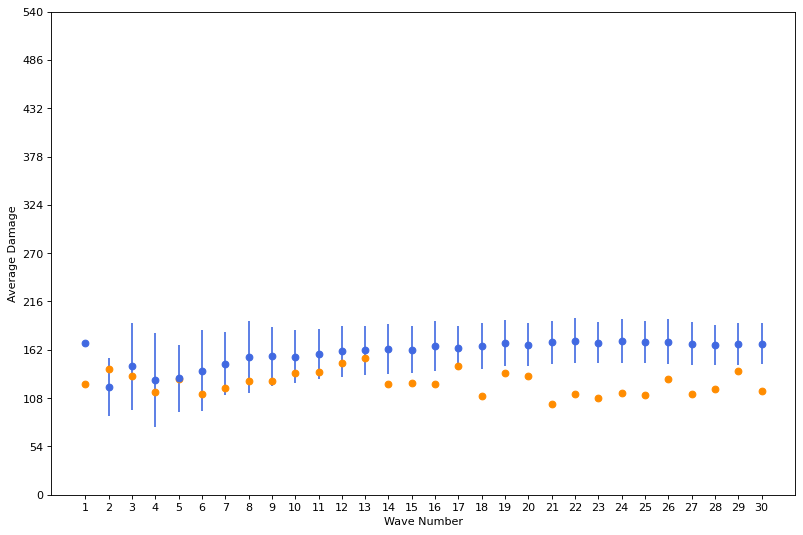

In [30]:
plt.figure(figsize=(12, 8), dpi=80)
plt.errorbar(td_allred_ai_stats['wave number'], td_allred_ai_stats['average damage'], yerr=td_allred_ai_stats['standart deviation'], linestyle='None', marker='o', color='royalblue')
plt.plot(td_allred_rd_stats['wave number'], td_allred_rd_stats['average damage'], linestyle='None', marker='o', color='darkorange')
plt.xlabel('Wave Number')
plt.xticks(td_allred_ai_stats['wave number'])
plt.ylabel('Average Damage')
#std_max = np.floor(float(td_allred_ai_stats['standart deviation'].max()))
#dmg_min = 0.9 * np.floor(float(td_allred_ai_stats['average damage'].min())) - std_max
#dmg_max = 1.2 * np.ceil(float(td_allred_ai_stats['average damage'].max())) + std_max
dmg_min = 0.0
dmg_max = 540.0 + 1
plt.yticks(np.arange(dmg_min, dmg_max, (dmg_max - dmg_min) // 10))
#print(td_allred_ai_stats['standart deviation'])
plt.show()

In [29]:
dmg_min = 0.0
dmg_max = 540.0 + 1
np.arange(dmg_min, dmg_max, (dmg_max - dmg_min) // 10)

array([  0.,  54., 108., 162., 216., 270., 324., 378., 432., 486., 540.])

NameError: name 'mean_wave_rg_ai' is not defined

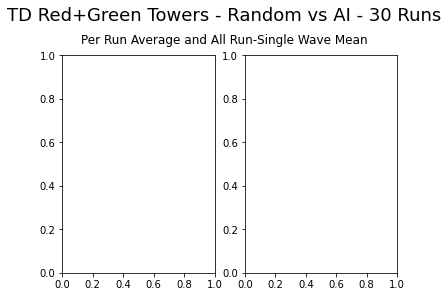

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.text(x=0.5, y=1.0, s='TD Red+Green Towers - Random vs AI - 30 Runs', fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s='Per Run Average and All Run-Single Wave Mean', fontsize=12, ha="center", transform=fig.transFigure)
ax1.plot(mean_wave_rg_ai, 'bo',label='AI')
ax1.plot(mean_wave_rg_random, 'ro', label='Random')
ax2.plot(mean_perwave_rg_ai, 'bo',label='AI')
ax2.plot(mean_perwave_rg_random, 'ro', label='Random')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.set_figwidth(15)
plt.show()

print('Média da AI: ' + str(td_redgreen_ai[td_redgreen_ai.columns[-1]].mean()))
print('Desvio Padrão da AI: ' + str(td_redgreen_ai[td_redgreen_ai.columns[-1]].std()))
print('Média da Random: ' + str(td_redgreen_random[td_redgreen_random.columns[-1]].mean()))
print('Desvio Padrão da Random: ' + str(td_redgreen_random[td_redgreen_random.columns[-1]].std()))